In [ ]:
# 참고링크

# financedatareader 사용법
# https://financedata.github.io/posts/finance-data-reader-users-guide.html

# 각종지표 출력
# https://m.blog.naver.com/stochastic73/222126545678

In [34]:
# 라이브러리 선언

import FinanceDataReader as web
from datetime import date, timedelta
import matplotlib.pyplot as plt
import datetime
import pandas as pd
from http.server import BaseHTTPRequestHandler, HTTPServer

%matplotlib inline

In [4]:
# 시작일, 오늘, 이전일에 대한 변수 지정
today = date.today()
startday = date.today() - timedelta(720)
yesterday = date.today() - timedelta(1)

print(today)
print(startday)
print(yesterday)

2021-05-30
2019-06-10
2021-05-29


In [5]:
# 목표 시장 선택 및 데이터 로드
targetMarket = web.StockListing('NASDAQ')

100%|██████████████████████████████████████████████████████████████████████████████| 3839/3839 [00:42<00:00, 90.47it/s]


In [6]:
targetMarket.head(5)

,Symbol,Name,Industry,IndustryCode
0,AAPL,Apple Inc,"컴퓨터, 전화 및 가전제품",571060
1,MSFT,Microsoft Corp,소프트웨어 및 IT서비스,572010
2,AMZN,Amazon.com Inc,다양한 소매업,534020
3,FB,Facebook Inc Class A,소프트웨어 및 IT서비스,572010
4,GOOGL,Alphabet Inc Class A,소프트웨어 및 IT서비스,572010


In [9]:
targetMarket.dtypes

Symbol          object
Name            object
Industry        object
IndustryCode    object
dtype: object

In [36]:
# 목표 시장 내 상위 200종목 선정
symbolList = targetMarket.loc[:199, "Symbol"]
nameList = targetMarket.loc[:199, "Name"]

In [46]:
t1 = pd.DataFrame(data = list(zip(symbolList, nameList)), columns = ['stockCode', 'corpName'])

In [47]:
t1

,stockCode,corpName
0,AAPL,Apple Inc
1,MSFT,Microsoft Corp
2,AMZN,Amazon.com Inc
3,FB,Facebook Inc Class A
4,GOOGL,Alphabet Inc Class A
...,...,...
195,MPWR,Monolithic Power Systems Inc
196,AAL,American Airlines Group Inc
197,PTC,PTC Inc
198,LKQ,LKQ Corp


In [22]:
symbolList[0]

'AAPL'

In [23]:
# 특정 주식코드 받아서 도표로 그려줌
SEC = web.DataReader(symbolList[0], startday, yesterday)

<AxesSubplot:xlabel='Date'>

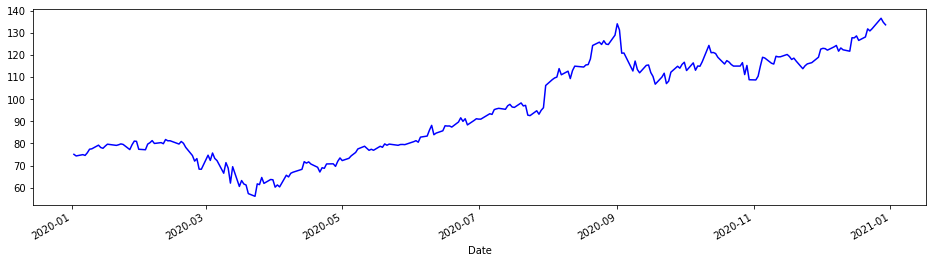

In [25]:
# 예시, 2020 애플 종가기준 도표 형성
SEC["2020-01-01" : "2020-12-30"]['Close'].plot(figsize = (16, 4), style = 'b')

In [27]:
SEC["MA_5"]=SEC["Close"].rolling(window=5).mean()
SEC["MA_20"]=SEC["Close"].rolling(window=20).mean()
SEC["diff"]=SEC["MA_5"]-SEC["MA_20"]

In [28]:
SEC

,Close,Open,High,Low,Volume,Change,MA_5,MA_20,diff
Date,,,,,,,,,
2019-06-10,48.15,47.95,48.84,47.91,104880000.0,0.0128,NaN,NaN,NaN
2019-06-11,48.70,48.72,49.00,48.40,107730000.0,0.0114,NaN,NaN,NaN
2019-06-12,48.55,48.49,48.99,48.35,73010000.0,-0.0031,NaN,NaN,NaN
2019-06-13,48.54,48.67,49.20,48.40,86700000.0,-0.0002,NaN,NaN,NaN
2019-06-14,48.19,47.89,48.40,47.58,75050000.0,-0.0072,48.426,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-05-24,127.10,126.09,127.94,125.95,63090000.0,0.0133,125.876,128.2475,-2.3715
2021-05-25,126.90,127.67,128.28,126.32,72010000.0,-0.0016,126.286,127.8730,-1.5870
2021-05-26,126.85,126.93,127.36,126.43,56580000.0,-0.0004,126.718,127.5365,-0.8185


In [ ]:
# 필요한 각 수치 지정 필요

In [48]:
# 가동일 기준 데이터를 로드, 리스트를 생성해줄 클래스 생성
# 기준이 될 시작일자, 시장목록을 입력받는다.

# 시장목록 : KRX(한국전체), KOSPI(코스피전체), KOSDAQ(코스닥전체), KONEX(코넥스전체),
# / NASDAQ(나스닥종목), NYSE(뉴욕증권거래소), AMEX(AMEX종목), SP500(S&P500 종목)

def createData(dayago, market):
    today = date.today()
    startday = date.today() - timedelta(dayago)
    yesterday = date.today() - timedelta(1)
    
    # 목표 시장 선택 및 데이터 로드
    print("loading entire stockcode data from market..")
    try:
        targetMarket = web.StockListing(market)
        print("loading complete. making lists..")
        
        # 목표 시장 내 상위 100종목 선정
        symbolList = targetMarket.loc[:99, "Symbol"]
        nameList = targetMarket.loc[:99, "Name"]
        
        marketList = pd.DataFrame(data = list(zip(symbolList, nameList)), columns = ['stockCode', 'corpName'])
        marketList.to_csv('marketList_' + str(today) + '.csv')
        print("list created, initialize next steps.")
        
    except:
        time.sleep(3)
        print("loading error occured, please try again or check ur status.")

In [ ]:
# 종가기준 도표를 작성 밎 저장할 클래스 생성

In [35]:
# 리퀘스트 처리할 클래스 생성

class reqHandler(BaseHTTPRequestHandler):
    
    def menuSelect(self):
        # 결과창 : "종목명"(종목코드), 매수/매도추천여부(점수) 출력
        # ex) http://localhost:8666/finance/showRes?how=(buy/sell)&duration=(long/short)&recommand=(on/off)&stockcode=(AAPL_TSLA)
        # 추천은 변동폭 기준 전망이 좋은 상위 10개 종목 내용 추가함. 타 조건과 겹칠 수 있다.
        # 매수 / 매도 옵션에 따라 적용되는 식을 다르게 한다. 검색하는 코드들만 내용 출력할 것.
        data = []
        if None != re.search('/finance/*', self.path):
            if None != re.search('finance/showRes', self.path):
                queryString = urlparse.split('&')
                modSet = queryString[0].split('=')[1]
                rangeSet = queryString[1].split('=')[1]
                recommandSet = queryString[2].split('=')[1]
                targetStock = queryString[3].split('=')[1]
#                 switchs = [modSet, rangeSet, searchSet]

        else:
            self.send_response(404)
            self.send_header('Content-type', 'application/json')
            self.end_headers()

In [30]:
# url값 확인

urlparse = "http://localhost:8666/finance/showRes?how=(buy/sell)&duration=(long/short)&recommand=(on/off)&stockcode=(AAPL_TSLA)"
queryString = urlparse.split('&')
modSet = queryString[0].split('=')[1]
rangeSet = queryString[1].split('=')[1]
recommandSet = queryString[2].split('=')[1]
targetStock = queryString[3].split('=')[1]

In [31]:
queryString

['http://localhost:8666/finance/showRes?how=(buy/sell)',
 'duration=(long/short)',
 'recommand=(on/off)',
 'stockcode=(AAPL_TSLA)']